<img src="Images/logo.jpg" width="600">

## Exercitation_01

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import scipy.stats as stats

### Part 01

The first request is to test the Pseudo-Random Number generator given (files `random.`), in three different ways.
1. The first one consists in verify that the integral  $\langle r \rangle = \int_0^1 r dr = 0.5 $ gives the analitically calculated result. We have to show a plot with the extimation of this value and of its uncertainty, evaluated with the *Blocking Method*.  
2. The second task is similar to the first, but we have to calculate $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$ and its uncertainty.

I started writing this method in `P1/block.cpp`  , following the lineguide given in the Phyton script.  
I defined a function which takes in input the vector of data, the number of blocks $N$ and the output file. I used this function to evaluate the uncertainty of the integrals, calculated in `P1/main.cpp` with the Pseudo-Random Generator we want to test. 
The results, for $$ M=10^5, \quad \quad N=100 $$ are


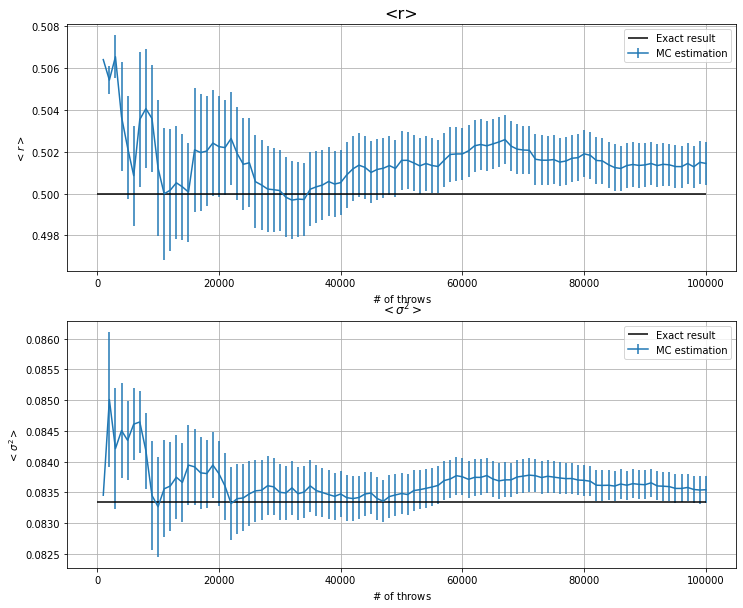

In [2]:
plt.figure(figsize=(12,10))

plt.subplot(211)
plt.title('<r>', fontsize = 16)
data= ascii.read('P1/Risultati/r.mean', format='no_header')
x = data['col1'] 
mean = data['col2'] #vector with mean
err = data['col3'] #vector with uncertainties
plt.grid(True)
plt.errorbar(x, mean, err, label = 'MC estimation')
plt.hlines(0.5, 0, 1E5, label = 'Exact result')
plt.xlabel('$\#$ of throws')
plt.ylabel('$<r>$')
plt.legend()

plt.subplot(212)
plt.title('$<\sigma^2>$')
datas= ascii.read('P1/Risultati/r.sigma', format='no_header')
xs = datas['col1']
sigma = datas['col2']  #vector with sigma2
err_s = datas['col3']  #vector with uncertainties
plt.grid(True)
plt.errorbar(xs, sigma, err_s, label = 'MC estimation')
plt.hlines(1/12, 0, 1E5, label = 'Exact result')
plt.xlabel('$\#$ of throws')
plt.ylabel('$<\sigma^2>$')

plt.legend()
plt.show()

In these plots, the black lines represent the expected value, while the blue curves and bars are the measures and its uncertainties.  
We can see that, for larger number of throws, the measure is nearer and nearer the expected value, as we could expect, and the error follows $\frac{1}{\sqrt{N}}$.

3. The last request of this exercise is to test the Pseudo-Random Generator with another method: a $\chi^2$-test.  
I divided the interval in $M$ sub-intervals and, generating $10^6$ Pseudo-Random numbers, I counted how many numbers $n_i$ fall in each sub-interval, and then I evaluated 
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M},$$
where I used $M=100$ and $n=10^4$.  
You can find the implementation of this method at the bottom of `P1/main.cpp`: cycling on each sub-interval, I count how many numbers fell in that interval. Then I evaluated the formula above and I got a $\chi^2_j$ value.  
Finally, I have a vector with $100$ values of $\chi^2_j$, one for every sub-interval.  
The result is:

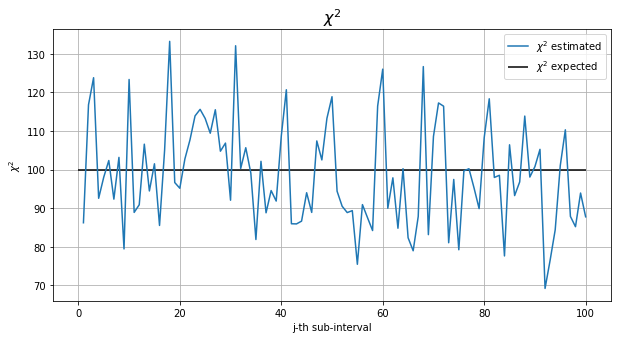

In [3]:
datac= ascii.read('P1/Risultati/Chi2.test', format='no_header')
xc = datac['col1']
chi2 = datac['col2']

plt.figure(figsize=(10,5))
plt.title('$\chi^2$', fontsize = 16)
plt.grid(True)
plt.plot(xc, chi2, label = '$\chi^2$ estimated')
plt.hlines(100, 0, 1E2, label = '$\chi^2$ expected')
plt.xlabel('j-th sub-interval')
plt.ylabel('$\chi^2$')
plt.legend()
plt.show()

Again, the black line represents the expected value, i.e. $\dfrac{n}{M}=100$.  
The values obtained in these three tests are in good-agree with the expected values, so we can conclude and confirm the reliability of this generator.

### Part 02
    
We have to test Central Limit Theorem, performing $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), where $x_i$ a random variable, sampled throwing a *standard 6-faces* dice, an *exponential* dice (with $\lambda=1$) and a *Lorentzian* dice (with $\mu=0$ and $\Gamma=1$).  
First of all, I computed two functions to extract random variables with an exponential distribution (case 1) and with a Lorentzian distribution (case 2), by using the method of the *inversion of the cumulative distribution*:
1. The exponential function $p_x(x)= \lambda e^{-\lambda x}$, $0 \leq x < \infty$.  
We have $$F_x(x) = \int_0^x \lambda e^{-\lambda x'} dx' = 1-e^{-\lambda x}. $$
If $y=F_x(x)$ is uniformly distribuited between 0 and 1, then $$x = -\frac{1}{\lambda} \text{ln}(1-y)$$
is a random variable with exponential distribution.  
I implemented a function in `random.cpp` that do that, requiring in input the value of $\lambda$.  
2. The Lorentzian function $p_x(x)= \frac{1}{\pi} \frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $-\infty < x < \infty$. 
We have $$F_x(x) =\frac{1}{\pi} \, \text{tan}^{-1}\bigg( \frac{x}{\Gamma}   \bigg) + \frac{1}{2} . $$
If $y=F_x(x)$ is uniformly distribuited between 0 and 1, then $$x = \Gamma \, \text{tan} \bigg[ \pi \bigg( y- \frac{1}{2} \bigg) \bigg] + \mu  $$
is a random variable with Lorentzian distribution. </br>
I implemented a function in `random.cpp` that do that, requiring in input the values of $\Gamma$ and $\mu$.  


The histograms normalized obtained with the values of $S_N$ are showed below.




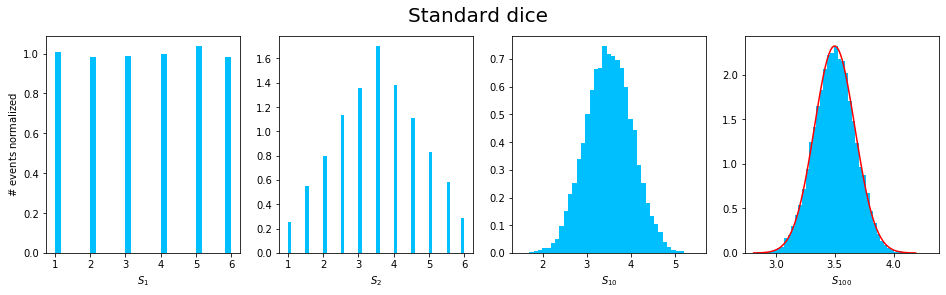

In [4]:
plt.figure(figsize=(16,4))
plt.suptitle('Standard dice', fontsize = 20)

plt.subplot(141)
dd1= ascii.read('P2/Risultati/dic_1.dice', format='no_header')
d1=dd1['col1']
plt.hist(d1,30, density=True, color='deepskyblue')
plt.xlabel('$S_{1}$')
plt.ylabel('$\#$ events normalized')

plt.subplot(142)
dd2= ascii.read('P2/Risultati/dic_2.dice', format='no_header')
d2=dd2['col1']
plt.hist(d2,50, density=True, color='deepskyblue')
plt.xlabel('$S_{2}$')


plt.subplot(143)
dd10= ascii.read('P2/Risultati/dic_10.dice', format='no_header')
d10=dd10['col1']
plt.hist(d10, 41, density=True, color='deepskyblue')
plt.xlabel('$S_{10}$')


plt.subplot(144)
dd100= ascii.read('P2/Risultati/dic_100.dice', format='no_header')
d100=dd100['col1']
plt.hist(d100,49, density=True, color='deepskyblue')
plt.xlabel('$S_{100}$')

#Fit
mu = np.mean(d100)
sigma= np.std(d100)
a = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(a, stats.norm.pdf(a, mu, sigma ), color = 'r')

plt.show()

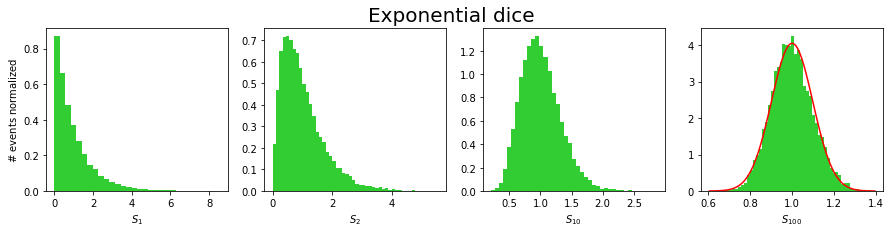

In [5]:
plt.figure(figsize=(15,3))
plt.suptitle('Exponential dice', fontsize = 20)

plt.subplot(141)
de1= ascii.read('P2/Risultati/exp_1.dice', format = 'no_header')
e1=de1['col1']
plt.hist(e1,30, density=True, color='limegreen')
plt.xlabel('$S_{1}$')
plt.ylabel('$\#$ events normalized')

plt.subplot(142)
de2= ascii.read('P2/Risultati/exp_2.dice', format = 'no_header')
e2=de2['col1']
plt.hist(e2,50, density=True, color='limegreen')
plt.xlabel('$S_{2}$')


plt.subplot(143)
de10= ascii.read('P2/Risultati/exp_10.dice', format = 'no_header')
e10=de10['col1']
plt.hist(e10, 41, density=True, color='limegreen')
plt.xlabel('$S_{10}$')


plt.subplot(144)
de100= ascii.read('P2/Risultati/exp_100.dice', format = 'no_header')
e100=de100['col1']
plt.hist(e100,51, density=True, color='limegreen')
plt.xlabel('$S_{100}$')

#Fit
mue = np.mean(e100)
sigmae= np.std(e100)
ae = np.linspace(mue - 4*sigmae, mue + 4*sigmae, 100)
plt.plot(ae, stats.norm.pdf(ae, mue, sigmae ), color = 'r')


plt.show()

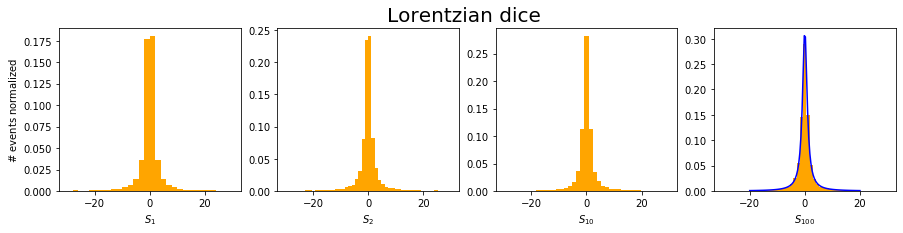

In [6]:
plt.figure(figsize=(15,3))
plt.suptitle('Lorentzian dice', fontsize = 20)

plt.subplot(141)
dl1= ascii.read('P2/Risultati/lorentz_1.dice', format = 'no_header')
l1=dl1['col1']
plt.hist(l1,30, range=(-30,30), density=True, color='orange')
plt.xlabel('$S_{1}$')
plt.ylabel('$\#$ events normalized')

plt.subplot(142)
dl2= ascii.read('P2/Risultati/lorentz_2.dice', format = 'no_header')
l2=dl2['col1']
plt.hist(l2,50, range=(-30,30), density=True, color='orange')
plt.xlabel('$S_{2}$')

plt.subplot(143)
dl10= ascii.read('P2/Risultati/lorentz_10.dice', format = 'no_header')
l10=dl10['col1']
plt.hist(l10, 41, range=(-30,30), density=True, color='orange')
plt.xlabel('$S_{10}$')

plt.subplot(144)
dl100= ascii.read('P2/Risultati/lorentz_100.dice', format = 'no_header')
l100=dl100['col1']
plt.hist(l100,51, range=(-30,30), density=True, color='orange')
plt.xlabel('$S_{100}$')


#Fit
mul, gammal = stats.cauchy.fit(l100)
xl = np.linspace(-20, 20, 100)
y_fit = stats.cauchy.pdf(xl, mul, gammal)
plt.plot(xl, y_fit , color = 'b')

plt.show()

In each of the three cases the last curve is fitted with a Gaussian (*standard dice* and *exponential dice*) and with a Lorentzian (*Lorentzian dice*). </br>
The fit is better and better with the increasing value of $N$, and this is a confirmation of the Central Limit Theorem, because we considered variables extracted with the same distribution and extracted indipendently.

### Part 03
    
In this exercise we have to simulate the <a href="https://en.wikipedia.org/wiki/Buffon%27s_needle_problem"> Buffon's experiment </a>.  
The lenght of the needle is $L=1$ and the distance between two lines on the plane is $d=1.5$. I set these values because it must be $d>L$ but not $d \gg L$.  
<img src="Images/The-Buffon-needle-problem.png" width="600">    
    
To avoid tu use $\pi$ to evalue $\pi$ I extract 3 random values: 
- A $D$ value in $[0,d]$ which represents the position of the center of the needle;
- Two coordinates $x,y$ which represent the angle of orientation of the needle with respect to the horizontal lines, because $$\sin \theta = \frac{y}{\sqrt{x^2+y^2}},$$ with the condition that $x^2+y^2<1$.  
I generate $10^4$ throws and count how many of them intersect a line, i.e. the condition $$\frac{l}{2}+D \geq d  \quad \text{or} \quad \frac{l}{2} \geq D \, , $$
where $l=L\dfrac{y}{\sqrt{x^2+y^2}}$, the lenght of the projection in the direction orthogonal to the lines. </br>
In the following plot I show the values of $\pi$ obtained and, using the *blocking method* with $N=100$, the associated uncertainty.  


The black line represent the known value of $\pi$, taken from the `numpy`<a href="https://docs.scipy.org/doc/numpy/reference/constants.html"> library </a>.

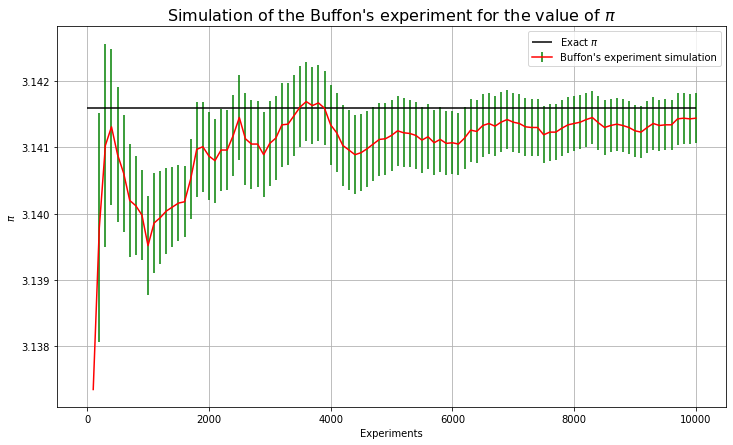

In [38]:
data3= ascii.read('P3/Risultati/Pi.ext', format='no_header')   #loading the data
x3 = data3['col1']
pi = data3['col2']
err3 = data3['col3']

plt.figure(figsize=(12,7))   #plotting the results
plt.title('Simulation of the Buffon\'s experiment for the value of $\pi$', fontsize = 16)
plt.grid(True)
plt.errorbar(x3, pi, err3, color='red', ecolor='green', label='Buffon\'s experiment simulation')
plt.hlines(np.pi, 0, 1E4, label='Exact $\pi$')
plt.xlabel('Experiments')
plt.ylabel('$\pi$')

plt.legend()
plt.show()